# ARIMA Model approach

## Get the data from a library from the databse

Connected to database
[(datetime.datetime(2023, 9, 30, 7, 0), 2), (datetime.datetime(2023, 9, 30, 7, 15), 2), (datetime.datetime(2023, 9, 30, 7, 30), 1), (datetime.datetime(2023, 9, 30, 7, 45), 4), (datetime.datetime(2023, 9, 30, 8, 0), 1), (datetime.datetime(2023, 9, 30, 8, 15), 2), (datetime.datetime(2023, 9, 30, 8, 30), 2), (datetime.datetime(2023, 9, 30, 8, 45), 2), (datetime.datetime(2023, 9, 30, 9, 0), 4), (datetime.datetime(2023, 9, 30, 9, 15), 2), (datetime.datetime(2023, 9, 30, 9, 30), 1), (datetime.datetime(2023, 9, 30, 9, 45), 3), (datetime.datetime(2023, 9, 30, 10, 0), 3), (datetime.datetime(2023, 9, 30, 10, 15), 3), (datetime.datetime(2023, 9, 30, 10, 30), 4), (datetime.datetime(2023, 9, 30, 10, 45), 3), (datetime.datetime(2023, 9, 30, 11, 0), 3), (datetime.datetime(2023, 9, 30, 11, 15), 3), (datetime.datetime(2023, 9, 30, 11, 30), 3), (datetime.datetime(2023, 9, 30, 11, 45), 3), (datetime.datetime(2023, 9, 30, 12, 0), 2), (datetime.datetime(2023, 9, 30, 12, 15), 3), (date

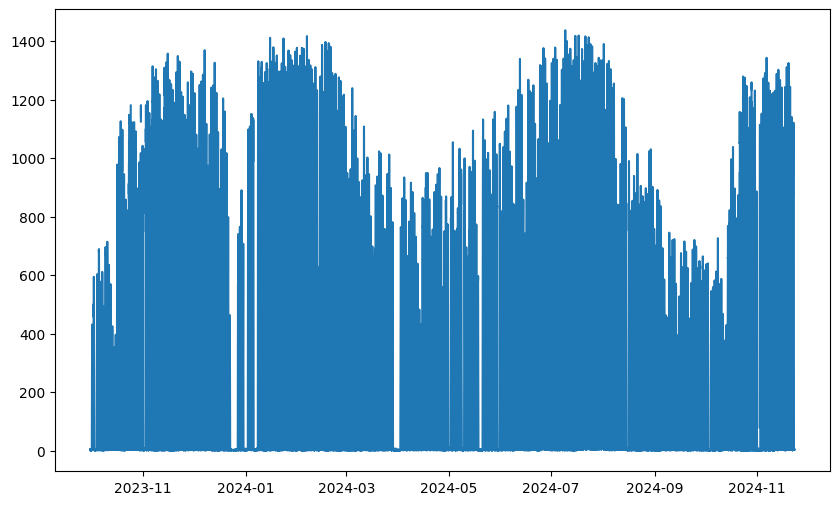

In [3]:
from dotenv import load_dotenv
from data.get_data import get_data_frame
import matplotlib.pyplot as plt

load_dotenv(".env")

library_id = 1
data = get_data_frame(library_id)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data["timestamp"], data["user_count"], label="Users")

## Smoothing the data

In [4]:
data['user_count'] = data['user_count'].rolling(window=10).mean()
data = data.dropna()

## Define the model

In [5]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['user_count'], order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())

/Users/thomasflorian/Library/Caches/pypoetry/virtualenvs/ml-88k2Jjgp-py3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/thomasflorian/Library/Caches/pypoetry/virtualenvs/ml-88k2Jjgp-py3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/thomasflorian/Library/Caches/pypoetry/virtualenvs/ml-88k2Jjgp-py3.13/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of i

                               SARIMAX Results                                
Dep. Variable:             user_count   No. Observations:                32788
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -148085.925
Date:                Sat, 23 Nov 2024   AIC                         296183.850
Time:                        09:05:09   BIC                         296234.237
Sample:                             0   HQIC                        296199.949
                              - 32788                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5016      0.001    630.455      0.000       0.500       0.503
ar.L2          0.2686      0.001    221.806      0.000       0.266       0.271
ar.L3          0.1095      0.002     49.122      0.0

## Plot the residuals

Following tests are performed to check the stationarity of the data:
- **Residual Plot**: Should show no obvious patterns.
- **Histogram**: Should resemble a normal distribution.
- **Q-Q Plot**: Points should lie on the line.
- **ACF and PACF Plots**: Should show no significant lags.
- **Ljung-Box Test**: p-value should be high (typically > 0.05), indicating no significant autocorrelation.

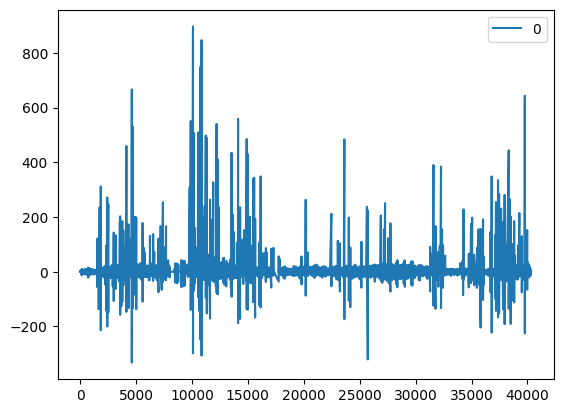

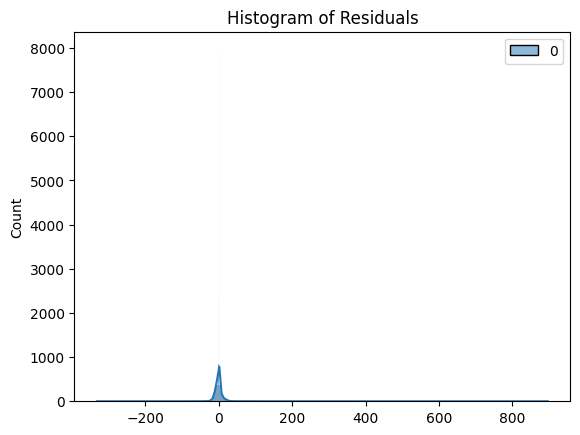

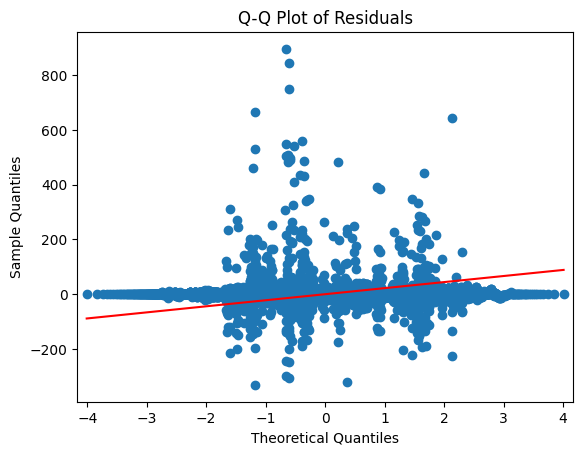

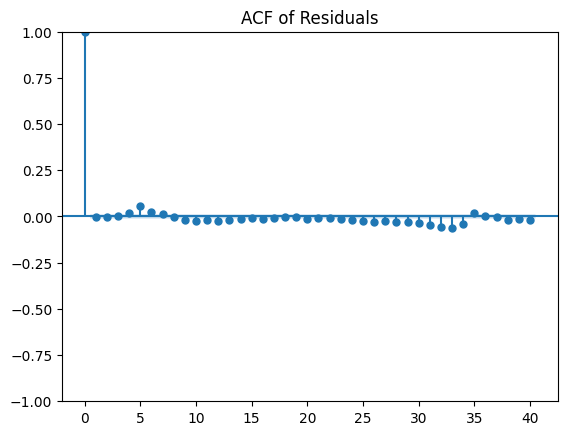

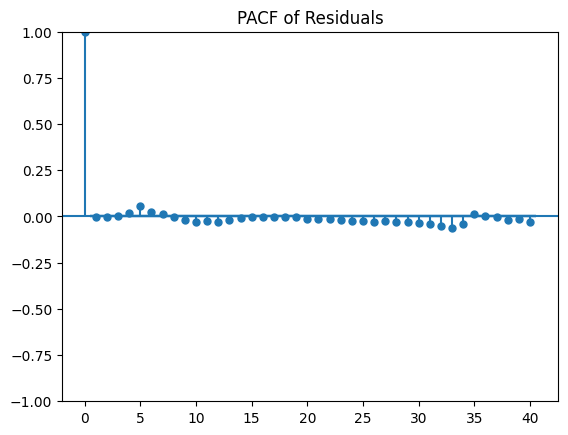

      lb_stat     lb_pvalue
10  171.49373  1.360708e-31


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pandas import DataFrame

residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Plot histogram of residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

# ACF and PACF plots
plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()

plot_pacf(residuals, lags=40)
plt.title("PACF of Residuals")
plt.show()

# Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

In [ ]:



train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]